In [0]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/result2010-2020.csv')
print(df.shape)
df.head(2)

(82806, 19)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,primaryTitle,startYear,runtimeMinutes,genres,tconst,averageRating,numVotes,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,The Woman with the Knife,2010,80,"Drama,Thriller",tt0064322,6.5,11,"nm0863604,nm11266595,nm0224522,nm0467896","nm0896894,nm0021550",NaN,NaN,nm11266596,NaN,NaN,nm0273914,NaN,NaN,NaN,NaN
1,Pál Adrienn,2010,136,Drama,tt0146592,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",NaN,NaN,nm1454415,NaN,nm1030585,nm1385818,nm1825349,nm1244017,NaN,nm1921430


In [212]:
df = df.drop(["tconst"],axis = 1)
print(df.shape)
df.head(3)

(82806, 18)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,archive_footage,archive_sound,cinematographer,composer,director,editor,producer,production_designer,self,writer
0,The Woman with the Knife,2010,80,"Drama,Thriller",6.5,11,"nm0863604,nm11266595,nm0224522,nm0467896","nm0896894,nm0021550",NaN,NaN,nm11266596,NaN,NaN,nm0273914,NaN,NaN,NaN,NaN
1,Pál Adrienn,2010,136,Drama,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",NaN,NaN,nm1454415,NaN,nm1030585,nm1385818,nm1825349,nm1244017,NaN,nm1921430
2,So Much for Justice!,2010,100,History,4.5,66,"nm0610960,nm0646037,nm0190691,nm1111050",NaN,NaN,NaN,nm0417349,NaN,nm0417352,"nm0417347,nm0190793","nm1064504,nm0687867",NaN,NaN,NaN


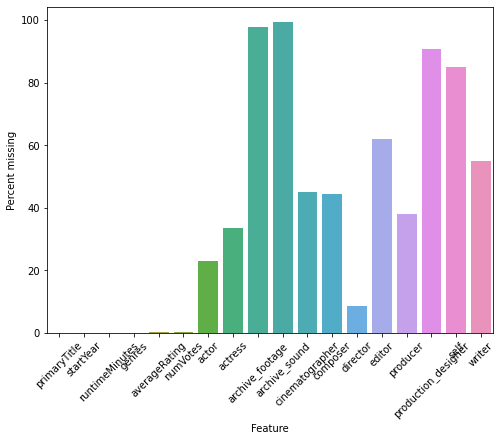

In [213]:
''' Deal with missing values. First, calculate the percentage of
missing values for every column, and plot them as a bar chart'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [214]:
# archive_footage, archive_sound, cinematographer, composer, editor, production_designer, self, writer have missing 
# values more than 40%, which means people may not pay much attention to these categories when they search for movies,
# and they may not effect the rating results. Thus we remove them.

df = df.drop(["archive_footage","archive_sound","cinematographer", "composer", "editor", "production_designer", "self", "writer"],axis = 1)
print(df.shape)
df.head(3)


(82806, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
0,The Woman with the Knife,2010,80,"Drama,Thriller",6.5,11,"nm0863604,nm11266595,nm0224522,nm0467896","nm0896894,nm0021550",NaN,NaN
1,Pál Adrienn,2010,136,Drama,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,"nm0610960,nm0646037,nm0190691,nm1111050",NaN,nm0417352,"nm1064504,nm0687867"


In [215]:
# There are still so much NaN in the dataset, we may drop and replace some lines.

# First, drop lines without rating and and numVotes.
df = df[df['averageRating'].notna()]
df = df[df['numVotes'].notna()]
print(df.shape)
df.head(3)

(82507, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
0,The Woman with the Knife,2010,80,"Drama,Thriller",6.5,11,"nm0863604,nm11266595,nm0224522,nm0467896","nm0896894,nm0021550",NaN,NaN
1,Pál Adrienn,2010,136,Drama,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,"nm0610960,nm0646037,nm0190691,nm1111050",NaN,nm0417352,"nm1064504,nm0687867"


In [216]:
# Second, if one movie has > 1 categories missing (less than 9 categories remains), drop them.

df = df.dropna(thresh=9)
print(df.shape)
df.head(3)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,"nm0610960,nm0646037,nm0190691,nm1111050",NaN,nm0417352,"nm1064504,nm0687867"
3,Children of the Green Dragon,2010,89,Drama,6.8,125,"nm0753588,nm3646734,nm0501862",nm1342004,nm1207262,nm1064504


In [217]:
# In genres part, each line may have > 1 genres(e.g. both Adventure and Comedy), we just keep the first one.

df[['genres','others']] = df['genres'].str.split(",", 1, expand=True)
df = df.drop('others', axis=1)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,"nm0957482,nm0395827","nm3140529,nm0961563",nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,"nm0610960,nm0646037,nm0190691,nm1111050",NaN,nm0417352,"nm1064504,nm0687867"
3,Children of the Green Dragon,2010,89,Drama,6.8,125,"nm0753588,nm3646734,nm0501862",nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,"nm0689220,nm0441468,nm0833105,nm0224786","nm0441502,nm0199258",nm0660147,NaN
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,"nm1517976,nm0000168,nm0159789",nm0001605,"nm1004541,nm0820800","nm3368118,nm2800118"
7,The Overnight,2010,88,\N,7.5,24,"nm1211335,nm0482470,nm0000465",nm1029032,nm1208371,"nm0962818,nm1211914"
8,In My Sleep,2010,104,Drama,5.5,1933,"nm0934618,nm1039877","nm0000327,nm0817844",nm1075006,"nm1603419,nm3828290"
10,Blind Sided,2010,\N,Comedy,7.4,14,"nm1069500,nm3834613","nm3846562,nm3829501",nm0706973,NaN
11,Anderson's Cross,2010,98,Comedy,5,107,"nm0912966,nm0608405","nm0001026,nm0349824",nm1516329,"nm1518156,nm2339181,nm0236202,nm1536258,nm2243221"
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,"nm0088371,nm2741363,nm2662182",NaN,"nm0074549,nm0936045"


In [218]:
# The same as actor, actress, director, producer

df[['actor','others']] = df['actor'].str.split(",", 1, expand=True)
df = df.drop('others', axis=1)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,nm0957482,"nm3140529,nm0961563",nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,nm0610960,NaN,nm0417352,"nm1064504,nm0687867"
3,Children of the Green Dragon,2010,89,Drama,6.8,125,nm0753588,nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,nm0689220,"nm0441502,nm0199258",nm0660147,NaN
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,nm1517976,nm0001605,"nm1004541,nm0820800","nm3368118,nm2800118"
7,The Overnight,2010,88,\N,7.5,24,nm1211335,nm1029032,nm1208371,"nm0962818,nm1211914"
8,In My Sleep,2010,104,Drama,5.5,1933,nm0934618,"nm0000327,nm0817844",nm1075006,"nm1603419,nm3828290"
10,Blind Sided,2010,\N,Comedy,7.4,14,nm1069500,"nm3846562,nm3829501",nm0706973,NaN
11,Anderson's Cross,2010,98,Comedy,5,107,nm0912966,"nm0001026,nm0349824",nm1516329,"nm1518156,nm2339181,nm0236202,nm1536258,nm2243221"
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,"nm0088371,nm2741363,nm2662182",NaN,"nm0074549,nm0936045"


In [219]:
df[['actress','others']] = df['actress'].str.split(",", 1, expand=True)
df = df.drop('others', axis=1)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,nm0957482,nm3140529,nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,nm0610960,NaN,nm0417352,"nm1064504,nm0687867"
3,Children of the Green Dragon,2010,89,Drama,6.8,125,nm0753588,nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,nm0689220,nm0441502,nm0660147,NaN
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,nm1517976,nm0001605,"nm1004541,nm0820800","nm3368118,nm2800118"
7,The Overnight,2010,88,\N,7.5,24,nm1211335,nm1029032,nm1208371,"nm0962818,nm1211914"
8,In My Sleep,2010,104,Drama,5.5,1933,nm0934618,nm0000327,nm1075006,"nm1603419,nm3828290"
10,Blind Sided,2010,\N,Comedy,7.4,14,nm1069500,nm3846562,nm0706973,NaN
11,Anderson's Cross,2010,98,Comedy,5,107,nm0912966,nm0001026,nm1516329,"nm1518156,nm2339181,nm0236202,nm1536258,nm2243221"
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,nm0088371,NaN,"nm0074549,nm0936045"


In [220]:
df[['director','others']] = df['director'].str.split(",", 1, expand=True)
df = df.drop('others', axis=1)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,nm0957482,nm3140529,nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,nm0610960,NaN,nm0417352,"nm1064504,nm0687867"
3,Children of the Green Dragon,2010,89,Drama,6.8,125,nm0753588,nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,nm0689220,nm0441502,nm0660147,NaN
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,nm1517976,nm0001605,nm1004541,"nm3368118,nm2800118"
7,The Overnight,2010,88,\N,7.5,24,nm1211335,nm1029032,nm1208371,"nm0962818,nm1211914"
8,In My Sleep,2010,104,Drama,5.5,1933,nm0934618,nm0000327,nm1075006,"nm1603419,nm3828290"
10,Blind Sided,2010,\N,Comedy,7.4,14,nm1069500,nm3846562,nm0706973,NaN
11,Anderson's Cross,2010,98,Comedy,5,107,nm0912966,nm0001026,nm1516329,"nm1518156,nm2339181,nm0236202,nm1536258,nm2243221"
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,nm0088371,NaN,"nm0074549,nm0936045"


In [221]:
df[['producer','others']] = df['producer'].str.split(",", 1, expand=True)
df = df.drop('others', axis=1)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,nm0957482,nm3140529,nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,nm0610960,NaN,nm0417352,nm1064504
3,Children of the Green Dragon,2010,89,Drama,6.8,125,nm0753588,nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,nm0689220,nm0441502,nm0660147,NaN
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,nm1517976,nm0001605,nm1004541,nm3368118
7,The Overnight,2010,88,\N,7.5,24,nm1211335,nm1029032,nm1208371,nm0962818
8,In My Sleep,2010,104,Drama,5.5,1933,nm0934618,nm0000327,nm1075006,nm1603419
10,Blind Sided,2010,\N,Comedy,7.4,14,nm1069500,nm3846562,nm0706973,NaN
11,Anderson's Cross,2010,98,Comedy,5,107,nm0912966,nm0001026,nm1516329,nm1518156
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,nm0088371,NaN,nm0074549


In [222]:
# Fill NaN and \N to 0

df = df.fillna(0)
df = df.replace('\\N', 0)
print(df.shape)
df.head(10)

(57829, 10)


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,Pál Adrienn,2010,136,Drama,6.7,466,nm0957482,nm3140529,nm1030585,nm1825349
2,So Much for Justice!,2010,100,History,4.5,66,nm0610960,0,nm0417352,nm1064504
3,Children of the Green Dragon,2010,89,Drama,6.8,125,nm0753588,nm1342004,nm1207262,nm1064504
5,The Souliotes,2010,91,Adventure,6.2,132,nm0689220,nm0441502,nm0660147,0
6,Quantum Quest: A Cassini Space Odyssey,2010,45,Adventure,4.9,291,nm1517976,nm0001605,nm1004541,nm3368118
7,The Overnight,2010,88,0,7.5,24,nm1211335,nm1029032,nm1208371,nm0962818
8,In My Sleep,2010,104,Drama,5.5,1933,nm0934618,nm0000327,nm1075006,nm1603419
10,Blind Sided,2010,0,Comedy,7.4,14,nm1069500,nm3846562,nm0706973,0
11,Anderson's Cross,2010,98,Comedy,5,107,nm0912966,nm0001026,nm1516329,nm1518156
12,Den milde smerte,2010,280,Drama,7.8,6,nm0104888,nm0088371,0,nm0074549


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57829 entries, 1 to 81694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primaryTitle    57829 non-null  object
 1   startYear       57829 non-null  int64 
 2   runtimeMinutes  57829 non-null  object
 3   genres          57829 non-null  object
 4   averageRating   57829 non-null  object
 5   numVotes        57829 non-null  object
 6   actor           57829 non-null  object
 7   actress         57829 non-null  object
 8   director        57829 non-null  object
 9   producer        57829 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.9+ MB


In [0]:
#Relationship between the imdb score and the profit made by the movie 

#ggplot(aes(x='imdb_score', y='Profit'), data=movie_df) +\
#    geom_line() +\
#    stat_smooth(colour='blue', span=1)

In [225]:
# Make some columns numeric

df['runtimeMinutes'] = df['runtimeMinutes'].astype('str').astype('int')
df['averageRating'] = df['averageRating'].astype('str').astype('float')
df['averageRating'] = df['averageRating'].astype('int')
df['numVotes'] = df['numVotes'].astype('str').astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57829 entries, 1 to 81694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   primaryTitle    57829 non-null  object
 1   startYear       57829 non-null  int64 
 2   runtimeMinutes  57829 non-null  int64 
 3   genres          57829 non-null  object
 4   averageRating   57829 non-null  int64 
 5   numVotes        57829 non-null  int64 
 6   actor           57829 non-null  object
 7   actress         57829 non-null  object
 8   director        57829 non-null  object
 9   producer        57829 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.9+ MB


In [0]:
#1 (a) Define a function to convert object types and string types to category type

def str_to_hashcode(my_df):
    for p,q in my_df.items(): #my_df.items() is a generator in Python
        if is_string_dtype(q): 
            my_df[p] = q.astype('category').cat.as_ordered()
            my_df[p] = my_df[p].cat.codes
    return my_df

In [0]:
df = str_to_hashcode(df)

In [228]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57829 entries, 1 to 81694
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   primaryTitle    57829 non-null  int32
 1   startYear       57829 non-null  int64
 2   runtimeMinutes  57829 non-null  int64
 3   genres          57829 non-null  int8 
 4   averageRating   57829 non-null  int64
 5   numVotes        57829 non-null  int64
 6   actor           57829 non-null  int32
 7   actress         57829 non-null  int16
 8   director        57829 non-null  int32
 9   producer        57829 non-null  int16
dtypes: int16(2), int32(3), int64(4), int8(1)
memory usage: 3.1 MB


,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,actor,actress,director,producer
1,35629,2010,136,9,6,466,7706,14381,9023,9243
2,40178,2010,100,12,4,66,5510,0,3870,5851
3,9631,2010,89,9,6,125,6430,7701,10726,5851
5,47961,2010,91,3,6,132,6050,2894,5949,0
6,35686,2010,45,3,4,291,11554,303,8641,14620


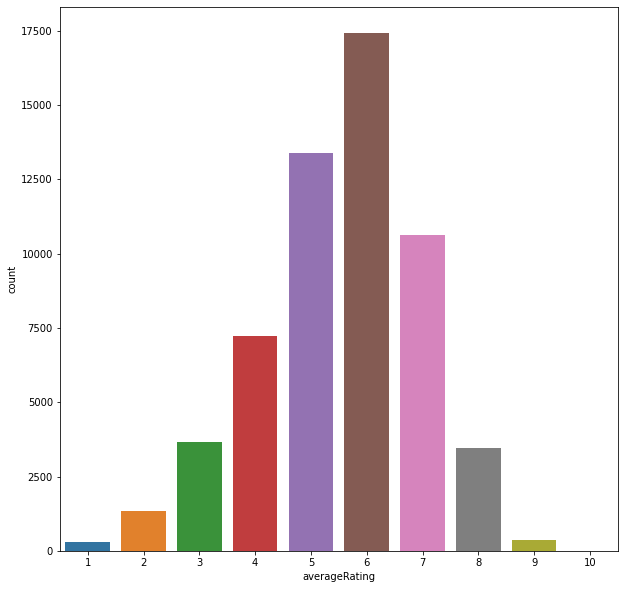

In [229]:
import seaborn as sns
# Graphical presentaion 
plt.figure(figsize=(10,10))
sns.countplot(df["averageRating"])
plt.show()

In [0]:
# Scale ratings into 0,1,2 which means low, medium, high score
df['averageRating'] = (df['averageRating']-1.5)/3
df['averageRating'] = df['averageRating'].astype('int')

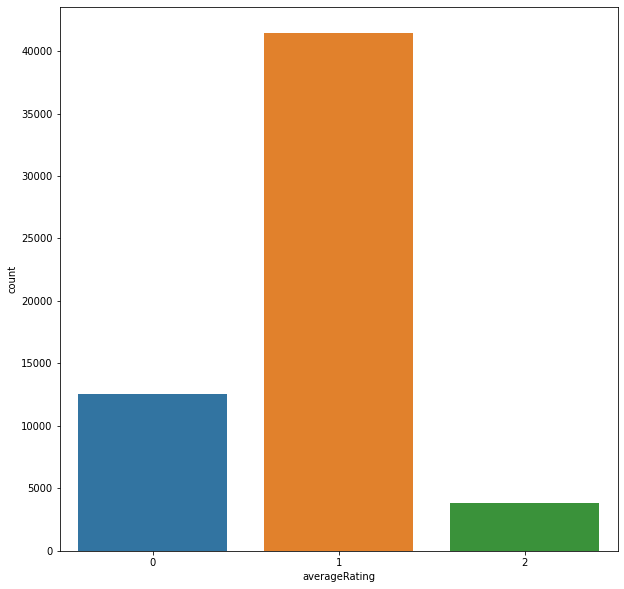

In [231]:
plt.figure(figsize=(10,10))
sns.countplot(df["averageRating"])
plt.show()

## Train-test split

In [0]:
X=pd.DataFrame(columns=['primaryTitle', 'startYear','runtimeMinutes','genres','numVotes',
            'actor','actress','director','producer'],data=df)
y=pd.DataFrame(columns=['averageRating'],data=df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Scale

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [234]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57829 entries, 1 to 81694
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   primaryTitle    57829 non-null  int32
 1   startYear       57829 non-null  int64
 2   runtimeMinutes  57829 non-null  int64
 3   genres          57829 non-null  int8 
 4   numVotes        57829 non-null  int64
 5   actor           57829 non-null  int32
 6   actress         57829 non-null  int16
 7   director        57829 non-null  int32
 8   producer        57829 non-null  int16
dtypes: int16(2), int32(3), int64(3), int8(1)
memory usage: 5.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57829 entries, 1 to 81694
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   averageRating  57829 non-null  int64
dtypes: int64(1)
memory usage: 3.4 MB


## model

### KNN 

In [245]:
from sklearn.neighbors import KNeighborsClassifier
for i in range (1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, np.ravel(y_train))
    knnpre = knn.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, knnpre))

Accuracy: 0.5904689445289805
Accuracy: 0.556508507400747
Accuracy: 0.6401991976760271
Accuracy: 0.6372942315672984
Accuracy: 0.6739521372250658
Accuracy: 0.668764697745193
Accuracy: 0.6887536312076359
Accuracy: 0.689514455664684
Accuracy: 0.6986443491492599
Accuracy: 0.7002351639230876
Accuracy: 0.703970120348596
Accuracy: 0.7048692765251072
Accuracy: 0.706045096140545
Accuracy: 0.709088393968737
Accuracy: 0.7116475307788076
Accuracy: 0.7108867063217595
Accuracy: 0.7112325356204178
Accuracy: 0.7119933600774657
Accuracy: 0.7122008576566606
Accuracy: 0.7137225065707566
Accuracy: 0.7135150089915617
Accuracy: 0.7129616821137087
Accuracy: 0.713653340711025
Accuracy: 0.715174989625121
Accuracy: 0.7145524968875363
Accuracy: 0.7148291603264628
Accuracy: 0.7157283165029741
Accuracy: 0.715382487204316
Accuracy: 0.7157283165029741


In [246]:
# Use the proper n_neighbors parameter as 28
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train, np.ravel(y_train))
knnpre = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, knnpre))

Accuracy: 0.715382487204316


In [247]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

cnf_matrix = confusion_matrix(y_test, knnpre)
cnf_matrix_df = pd.DataFrame(cnf_matrix)
cnf_matrix_df.head(3)

,0,1,2
0,224,2934,0
1,203,10117,2
2,20,956,2


In [248]:
cnf_matrix_df.columns = ["class 1","class 2", "class 3"]
cnf_matrix_df.index = ["class 1","class 2", "class 3"]
cnf_matrix_df = cnf_matrix_df.T
cnf_matrix_df

,class 1,class 2,class 3
class 1,224,203,20
class 2,2934,10117,956
class 3,0,2,2


Text(51.0, 0.5, 'Predicted')

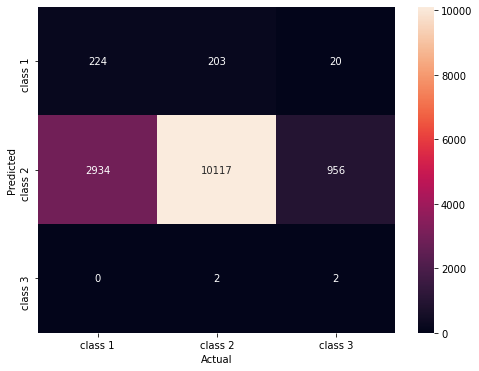

In [249]:
plt.figure(figsize = (8,6))
sns.heatmap(cnf_matrix_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [250]:
#class 2

# true positives
tp = 12257
#true negatives
tn = 126
#false positives
fp = 4834
#false negatives
fn = 132

# Recall (Sensitivity) = tp/tp+fn, Precision = tp/tp+fp

recall = tp/(tp+fn)
precision = tp/(tp+fp)
print("recall", recall, "precision", precision)

#F1 score = 2*(precision * recall)/precision + recall

f_score = (2*recall*precision)/(recall+precision)
print("F Score", f_score)

recall 0.9893453870368876 precision 0.7171610789304312
F Score 0.8315468113975577


### Logistic Regression

In [256]:
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train))
y_pred=logit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7139991700096833


Text(51.0, 0.5, 'Predicted')

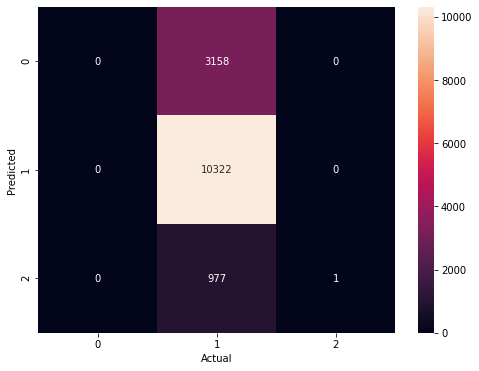

In [261]:
plt.figure(figsize = (8,6))
sns.heatmap(cnf_matrix_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")

### random forest

In [264]:
from sklearn.ensemble import RandomForestClassifier
for i in range (10, 300, 30):
    rfc = RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train, np.ravel(y_train))
    rfcpred = rfc.predict(X_test)
    #cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)    
    print(i)
    print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

10
Accuracy: 0.6983676857103334
40
Accuracy: 0.7301839811868861
70
Accuracy: 0.7317056301009821
100
Accuracy: 0.7342647669110527
130
Accuracy: 0.7330197814358832
160
Accuracy: 0.7328122838566883
190
Accuracy: 0.7340572693318578
220
Accuracy: 0.7353022548070273
250
Accuracy: 0.7333656107345414
280
Accuracy: 0.7322589569788353


In [267]:
# Use the proper n_estimators parameter as 220
rfc = RandomForestClassifier(n_estimators = 220)
rfc.fit(X_train, np.ravel(y_train))
rfcpred = rfc.predict(X_test)  
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))

Accuracy: 0.7330197814358832


Text(51.0, 0.5, 'Predicted')

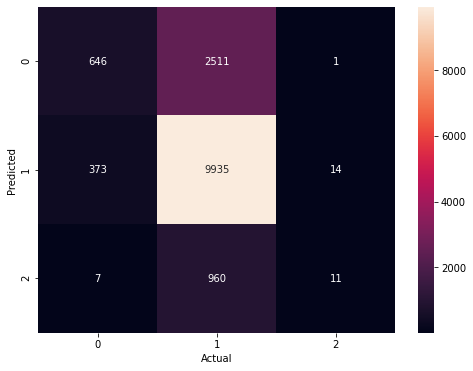

In [268]:
cnf_matrix = confusion_matrix(y_test, rfcpred)
plt.figure(figsize = (8,6))
sns.heatmap(cnf_matrix_df,annot = True,fmt = 'g')
plt.xlabel("Actual")
plt.ylabel("Predicted")